# Covid Cases Prediction

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading Data from W.H.O API
daily_data = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv', parse_dates=['Date_reported'])

In [3]:
daily_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
177508,2022-01-16,ZW,Zimbabwe,AFRO,297,225934,5,5243
177509,2022-01-17,ZW,Zimbabwe,AFRO,144,226078,4,5247
177510,2022-01-18,ZW,Zimbabwe,AFRO,382,226460,11,5258
177511,2022-01-19,ZW,Zimbabwe,AFRO,427,226887,8,5266


In [4]:
#Sorting based on the date, in reverese chronological order
daily_data.sort_values(by='Date_reported', ascending=True, inplace=True)
daily_data.reset_index(drop=True, inplace=True)

In [7]:
daily_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-03,VG,British Virgin Islands,AMRO,0,0,0,0
2,2020-01-03,SY,Syrian Arab Republic,EMRO,0,0,0,0
3,2020-01-03,CG,Congo,AFRO,0,0,0,0
4,2020-01-03,SL,Sierra Leone,AFRO,0,0,0,0
...,...,...,...,...,...,...,...,...
177508,2022-01-20,MR,Mauritania,AFRO,438,56296,3,914
177509,2022-01-20,JM,Jamaica,AMRO,1098,116084,4,2555
177510,2022-01-20,EC,Ecuador,AMRO,0,629507,0,34232
177511,2022-01-20,SM,San Marino,EURO,201,11278,1,106


In [5]:
#filtering only UK data
uk_data = daily_data[daily_data['Country'] == 'The United Kingdom']

In [9]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749 entries, 181 to 177337
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      749 non-null    datetime64[ns]
 1   Country_code       749 non-null    object        
 2   Country            749 non-null    object        
 3   WHO_region         749 non-null    object        
 4   New_cases          749 non-null    int64         
 5   Cumulative_cases   749 non-null    int64         
 6   New_deaths         749 non-null    int64         
 7   Cumulative_deaths  749 non-null    int64         
 8   Day                749 non-null    int64         
 9   Month              749 non-null    int64         
 10  Year               749 non-null    int64         
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 70.2+ KB


In [8]:
#splitting date into day, month and year
uk_data['Day'] = uk_data['Date_reported'].dt.day
uk_data['Month'] = uk_data['Date_reported'].dt.month
uk_data['Year'] = uk_data['Date_reported'].dt.year

/var/folders/lf/bghrz5n10l104kzzbh5k3fg80000gn/T/ipykernel_80289/1273473612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['Day'] = uk_data['Date_reported'].dt.day
/var/folders/lf/bghrz5n10l104kzzbh5k3fg80000gn/T/ipykernel_80289/1273473612.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['Month'] = uk_data['Date_reported'].dt.month
/var/folders/lf/bghrz5n10l104kzzbh5k3fg80000gn/T/ipykernel_80289/1273473612.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

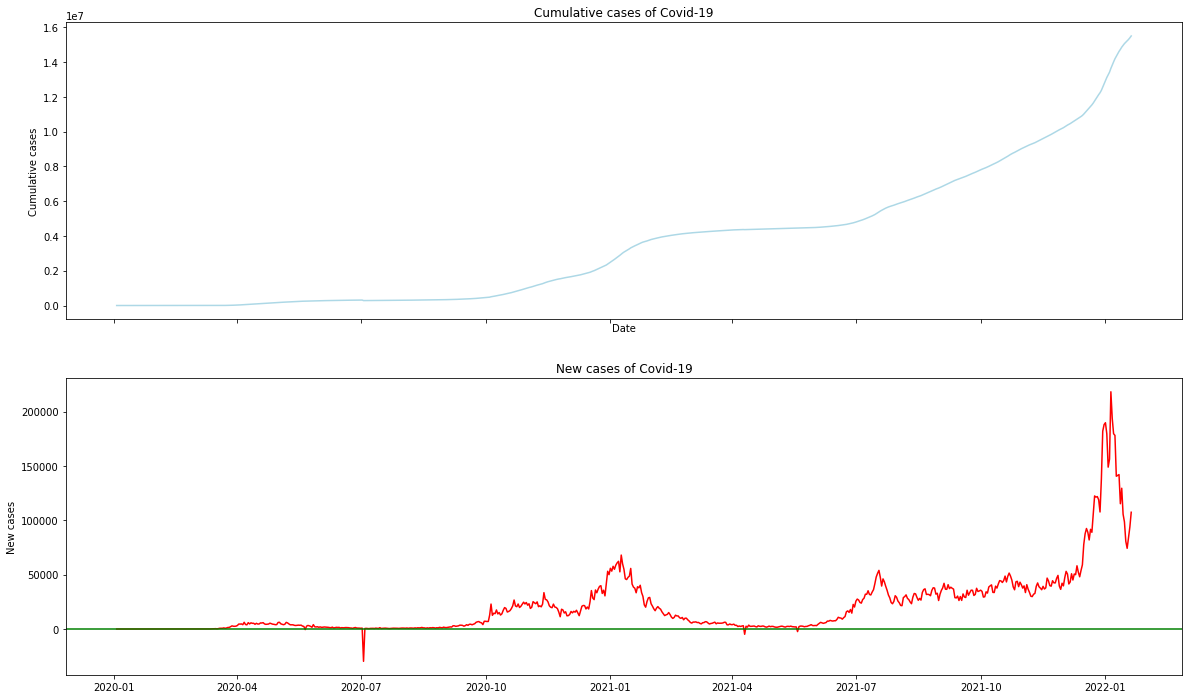

In [10]:
#Plotting the Cumulative and new cases for the UK against date
fig, ax = plt.subplots(figsize=(20, 12), ncols=1, nrows=2, sharex=True)
ax[0].plot(uk_data['Date_reported'], uk_data['Cumulative_cases'], linestyle='-', color='lightblue')
ax[1].plot(uk_data['Date_reported'], uk_data['New_cases'], linestyle='-', color='red')

ax[0].set_xlabel('Date')

ax[0].set_title('Cumulative cases of Covid-19')
ax[0].set_ylabel('Cumulative cases')

ax[1].set_title('New cases of Covid-19')
ax[1].set_ylabel('New cases')
ax[1].axhline(y=0, color='green', linestyle='-')
plt.show()

Found negative values in new cases, which can not happen, maybe it can be the number of people recovered from covid. But we don't have enough data to produce recovered stats in all the samples. negative new cases are zeroed and cumulative cases are recalculated.

In [11]:
uk_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day,Month,Year
181,2020-01-03,GB,The United Kingdom,EURO,0,0,0,0,3,1,2020
465,2020-01-04,GB,The United Kingdom,EURO,0,0,0,0,4,1,2020
520,2020-01-05,GB,The United Kingdom,EURO,0,0,0,0,5,1,2020
731,2020-01-06,GB,The United Kingdom,EURO,0,0,0,0,6,1,2020
986,2020-01-07,GB,The United Kingdom,EURO,0,0,0,0,7,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
176429,2022-01-16,GB,The United Kingdom,EURO,80704,15146718,287,151899,16,1,2022
176704,2022-01-17,GB,The United Kingdom,EURO,74267,15220985,91,151990,17,1,2022
176842,2022-01-18,GB,The United Kingdom,EURO,84429,15305414,85,152075,18,1,2022
177205,2022-01-19,GB,The United Kingdom,EURO,93890,15399304,438,152513,19,1,2022


In [12]:
#Finding negative new cases
uk_data[uk_data['New_cases'] < 0]['New_cases'].index

Int64Index([33119, 43142, 109810, 119058], dtype='int64')

In [13]:
uk_data['New_cases'].loc[uk_data[uk_data['New_cases'] < 0]['New_cases'].index] = 0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
uk_data[uk_data['New_cases'] < 0]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day,Month,Year


In [15]:
uk_data['cumsum'] = uk_data['New_cases'].cumsum()

/var/folders/lf/bghrz5n10l104kzzbh5k3fg80000gn/T/ipykernel_80289/2731571578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['cumsum'] = uk_data['New_cases'].cumsum()


In [16]:
uk_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day,Month,Year,cumsum
181,2020-01-03,GB,The United Kingdom,EURO,0,0,0,0,3,1,2020,0
465,2020-01-04,GB,The United Kingdom,EURO,0,0,0,0,4,1,2020,0
520,2020-01-05,GB,The United Kingdom,EURO,0,0,0,0,5,1,2020,0
731,2020-01-06,GB,The United Kingdom,EURO,0,0,0,0,6,1,2020,0
986,2020-01-07,GB,The United Kingdom,EURO,0,0,0,0,7,1,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...
176429,2022-01-16,GB,The United Kingdom,EURO,80704,15146718,287,151899,16,1,2022,15184193
176704,2022-01-17,GB,The United Kingdom,EURO,74267,15220985,91,151990,17,1,2022,15258460
176842,2022-01-18,GB,The United Kingdom,EURO,84429,15305414,85,152075,18,1,2022,15342889
177205,2022-01-19,GB,The United Kingdom,EURO,93890,15399304,438,152513,19,1,2022,15436779


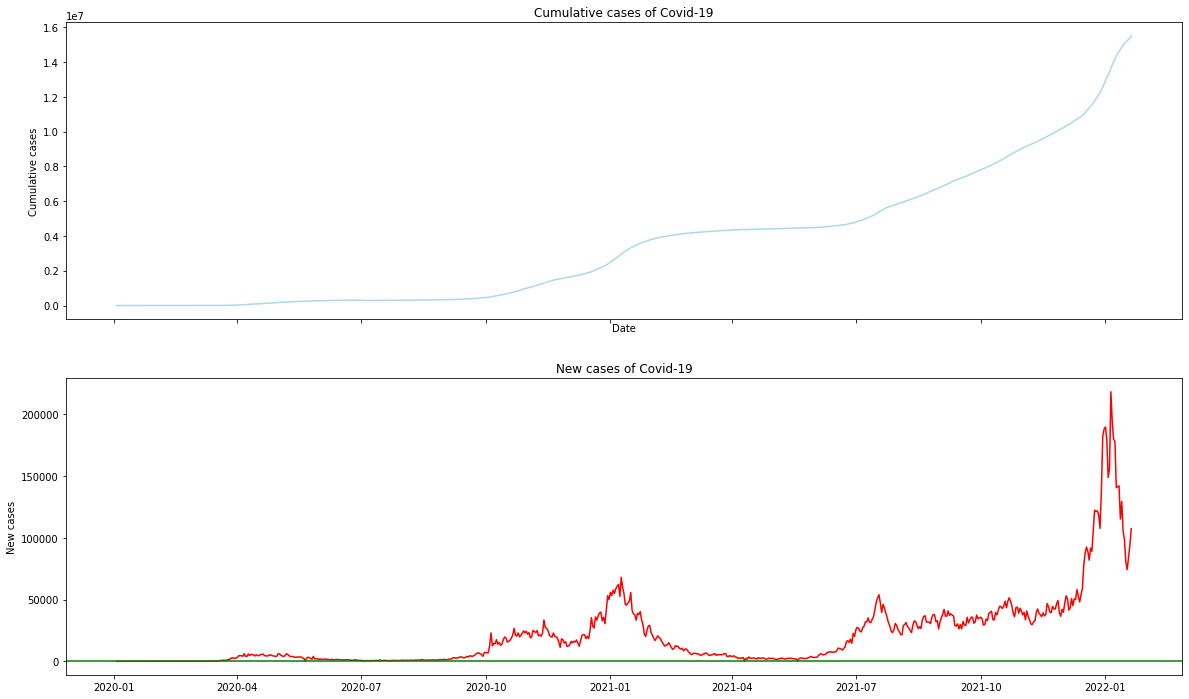

In [17]:
#Plotting the Cumulative and new cases for the UK against date
fig, ax = plt.subplots(figsize=(20, 12), ncols=1, nrows=2, sharex=True)
ax[0].plot(uk_data['Date_reported'], uk_data['Cumulative_cases'], linestyle='-', color='lightblue')
ax[1].plot(uk_data['Date_reported'], uk_data['New_cases'], linestyle='-', color='red')

ax[0].set_xlabel('Date')

ax[0].set_title('Cumulative cases of Covid-19')
ax[0].set_ylabel('Cumulative cases')

ax[1].set_title('New cases of Covid-19')
ax[1].set_ylabel('New cases')
ax[1].axhline(y=0, color='green', linestyle='-')
plt.show()